# Resumos e um Pouco de Visualização no Pandas

In [9]:
import pandas as pd
#encoding='latin1', encoding='ISO-8859-1', encoding='utf-8' ou então encoding='cp1252'

vendas = pd.read_csv(r'dados/Contoso - Vendas  - 2017.csv', sep=';')
produtos = pd.read_csv(r'dados/Contoso - Cadastro Produtos.csv', sep=';')
lojas = pd.read_csv(r'dados/Contoso - Lojas.csv', sep=';')
clientes = pd.read_csv(r'dados/Contoso - Clientes.csv', sep=';')
#Excluindo Colunas
clientes = clientes[['ID Cliente', 'E-mail']]
produtos = produtos[['ID Produto', 'Categoria']]
lojas = lojas[['ID Loja', 'Nome da Loja']]

vendas = vendas.merge(produtos, on='ID Produto')
vendas = vendas.merge(lojas, on='ID Loja')
vendas = vendas.merge(clientes, on='ID Cliente').rename(columns={'E-mail': 'E-mail do Cliente'})

display(vendas)

,Numero da Venda,Data da Venda,Data do Envio,ID Canal,ID Loja,ID Produto,ID Promocao,ID Cliente,Quantidade Vendida,Quantidade Devolvida,Categoria,Nome da Loja,E-mail do Cliente
0,1,01/01/2017,02/01/2017,1,86,981,2,6825,9,1,Câmera Digital,Loja Contoso Austin,rbrumfieldmy@ameblo.jp
1,880458,23/11/2017,23/11/2017,0,306,235,10,6825,8,0,Home Theater,Loja Contoso Europe Online,rbrumfieldmy@ameblo.jp
2,191019,20/03/2017,21/03/2017,1,172,376,2,6825,9,0,Laptop,Loja Contoso Hartford,rbrumfieldmy@ameblo.jp
3,18610,08/01/2017,10/01/2017,2,200,448,2,6825,48,0,Desktop,Loja Contoso Catalog,rbrumfieldmy@ameblo.jp
4,287704,23/04/2017,26/04/2017,3,76,280,1,6825,10,0,Home Theater,Loja Contoso Beaumont No.1,rbrumfieldmy@ameblo.jp
...,...,...,...,...,...,...,...,...,...,...,...,...,...
980637,878244,23/11/2017,23/11/2017,0,110,889,4,347,12,1,Acessório para Computador,Loja Contoso Orlando,edowner9m@imdb.com
980638,920243,09/12/2017,10/12/2017,1,261,1367,5,38781,13,0,Telefone para Casa & Escritório,Loja Contoso Damascus No.1,ruben31@adventure-works.com
980639,467482,21/06/2017,25/06/2017,4,115,269,1,553,10,0,Home Theater,Loja Contoso New York No.1,akuhnertfc@themeforest.net
980640,853643,13/11/2017,20/11/2017,7,115,809,4,38860,6,0,Acessório para Computador,Loja Contoso New York No.1,anne5@adventure-works.com


# Qual cliente mais comprou?
método .value_counts()
método .plot()

karen33@adventure-works.com       77
chloe77@adventure-works.com       74
julia43@adventure-works.com       69
destiny66@adventure-works.com     68
gilbert9@adventure-works.com      68
                                  ..
sean31@adventure-works.com         1
mpadfield9g@usnews.com             1
mary10@adventure-works.com         1
lstubbingtoni9@stumbleupon.com     1
darryl0@adventure-works.com        1
Name: E-mail do Cliente, Length: 38907, dtype: int64

<AxesSubplot:>

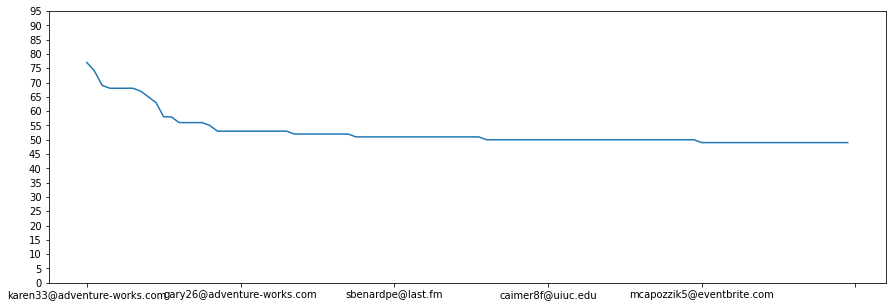

In [17]:
frequência_clientes = vendas['E-mail do Cliente'].value_counts()
display(frequência_clientes)
frequência_clientes[:100].plot(figsize=(15,5), yticks=range(0,100,5))

# Qual a Loja que mais Vendeu?
Usando o método groupby
Vai agrupar pelo nome da loja e somar todos os valores.


,Quantidade Vendida
Nome da Loja,
Loja Contoso Catalog,1029117
Loja Contoso North America Online,701961
Loja Contoso Europe Online,616845
Loja Contoso Asia Online,578458
Loja Contoso North America Reseller,520176
...,...
Loja Contoso Berlin,379
Loja Contoso Paterson,371
Loja Contoso Marseille,370


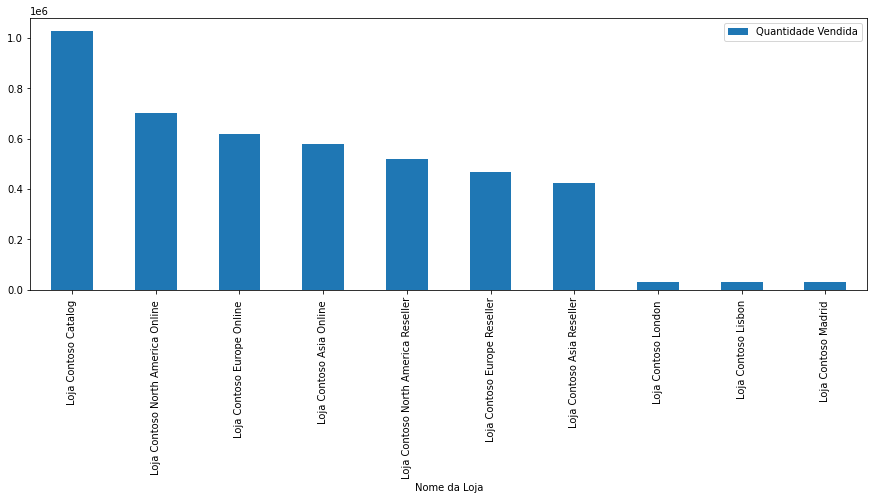

In [49]:
vendas_lojas = vendas.groupby('Nome da Loja').sum()
vendas_lojas = vendas_lojas[['Quantidade Vendida']].sort_values('Quantidade Vendida', ascending=False)
vendas_lojas[:10].plot(figsize=(15, 5), kind='bar')
display(vendas_lojas)